In [7]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
def collect_fdrq_values(gsea_dir="gsea_results"):
    matrix = {}

    for subdir in os.listdir(gsea_dir):
        subpath = os.path.join(gsea_dir, subdir)
        if not os.path.isdir(subpath):
            continue

        report_path = os.path.join(subpath, "gseapy.gene_set.prerank.report.csv")
        if not os.path.exists(report_path):
            continue

        # Recover the pretty cell type name
        cell_type = subdir.replace("_", " ")

        df = pd.read_csv(report_path)
        for _, row in df.iterrows():
            term = row['Term']
            fdr_qval = row['FDR q-val']
            matrix.setdefault(term, {})[cell_type] = -np.log10(fdr_qval + 1e-10)  # Avoid log(0)

    # Convert to DataFrame
    heatmap_df = pd.DataFrame.from_dict(matrix, orient='index')
    return heatmap_df

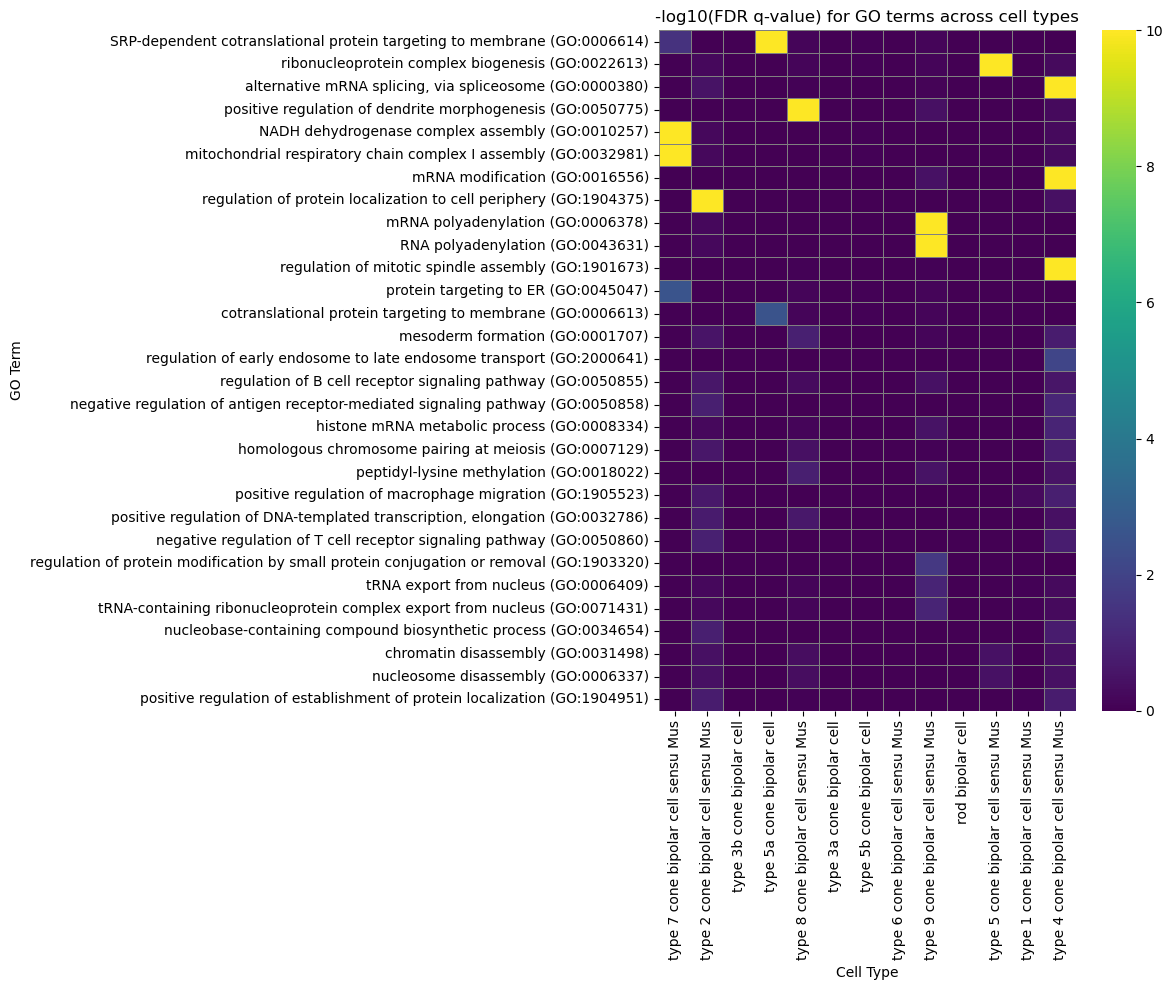

In [10]:
# Build the matrix
heatmap_df = collect_fdrq_values("gsea_results")

# Filter to top N GO terms (optional)
top_terms = heatmap_df.mean(axis=1).sort_values(ascending=False).head(30).index
heatmap_df = heatmap_df.loc[top_terms]

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_df, cmap="viridis", linewidths=0.5, linecolor='gray')
plt.title("-log10(FDR q-value) for GO terms across cell types")
plt.xlabel("Cell Type")
plt.ylabel("GO Term")
plt.tight_layout()
plt.show()